<a href="https://colab.research.google.com/github/alminha021/DS-rcf/blob/main/2_4variaveisnumericasRCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio 2.4 - Raul Costa Feitosa

# **Exercicio de distribuição de frequencia**


imports

In [ ]:
#imports
import math
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd

*Calculo do valor do intervalo*

In [ ]:
def calcinterval(dados,quantidade_intervalos):
    maximo = max(dados)
    minimo = min(dados)
    intervalo = (maximo - minimo)/quantidade_intervalos
    return intervalo

dataset=[8,30,30,54,86,94,102,110,169,170,176,236,240,241,242,255,262,276,279,282]
numero_intervalos = 6

tamanho_intervalo = calcinterval(dataset,numero_intervalos)
print("tamanho intervalo = ",tamanho_intervalo)

tamanho intervalo =  45.666666666666664


* Arredondamento do valor do intervalo*

In [ ]:
intervalo_corrigido = math.ceil(tamanho_intervalo)
print(intervalo_corrigido)

46


# Funçao que retorna os intervalos e a quantidade de valores dentro de cada intervalo.

In [ ]:
def contador_frequencia(dados,valor_intervalo):
    resultado = []
    count_resultado = []
    minimo = min(dados)
    for x in range(0,6):
        minimo_novo = minimo+valor_intervalo*x
        maximo_novo = minimo+valor_intervalo*(x+1)
        #print("mininimo",minimo_novo)
        #print("maximo",maximo_novo)
        subinterval = []
        ponto = 0
        for j in range(len(dados)):
            if maximo_novo > dados[j] >= minimo_novo:
                #print(dados[j], "somou")
                ponto += 1
                subinterval.append(dados[j])
        count_resultado.append(ponto)
        resultado.append(subinterval)
    return resultado,count_resultado


Retorno da função (intervalos e quantidade de numero de cada intervalo) quando o valor é arredondado

---



In [ ]:
resultado_frequencia_1 = contador_frequencia(dataset,intervalo_corrigido)
print(resultado_frequencia_1)

([[8, 30, 30], [54, 86, 94], [102, 110], [169, 170, 176], [236], [240, 241, 242, 255, 262, 276, 279, 282]], [3, 3, 2, 3, 1, 8])


Retorno da função (intervalos e quantidade de numero de cada intervalo) quando o valor * NÂO * é arredondado

In [ ]:
resultado_frequencia_2 = contador_frequencia(dataset,tamanho_intervalo)
print(resultado_frequencia_2)

([[8, 30, 30], [54, 86, 94], [102, 110], [169, 170, 176], [236], [240, 241, 242, 255, 262, 276, 279]], [3, 3, 2, 3, 1, 7])


Criando 2 listas para o caso 1: valor arredondado
1 contem apenas os valores do intervalo
2 contem apenas a quantidade de elementos em cada intervalo

In [ ]:
valores_intervalo_1 = resultado_frequencia_1[0]
valores_frequencia_1 = resultado_frequencia_1[1]
print("valores de cada intervalo = ", valores_intervalo_1)
print("valores de frequencia = ", valores_frequencia_1)


valores de cada intervalo =  [[8, 30, 30], [54, 86, 94], [102, 110], [169, 170, 176], [236], [240, 241, 242, 255, 262, 276, 279, 282]]
valores de frequencia =  [3, 3, 2, 3, 1, 8]


Criando 2 listas para o caso 2: valor NAO arredondado
1 contem apenas os valores do intervalo
2 contem apenas a quantidade de elementos em cada intervalo

In [ ]:
valores_intervalo_2 = resultado_frequencia_2[0]
valores_frequencia_2 = resultado_frequencia_2[1]
print("valores de cada intervalo = ", valores_intervalo_2)
print("valores de frequencia = ", valores_frequencia_2)

valores de cada intervalo =  [[8, 30, 30], [54, 86, 94], [102, 110], [169, 170, 176], [236], [240, 241, 242, 255, 262, 276, 279]]
valores de frequencia =  [3, 3, 2, 3, 1, 7]


**Abaixo o calculo das frequencias relativa para os 2 casos**

caso 1: onde o valor foi arredondado anteriormente

In [ ]:
total_1 = sum(valores_frequencia_1)
print(total_1)

freq_absoluta_1 = []
for i in range(len(valores_frequencia_1)):
    freq_absoluta_1.append(valores_frequencia_1[i]/total_1)

print(freq_absoluta_1)

20
[0.15, 0.15, 0.1, 0.15, 0.05, 0.4]


no caso 2, ao não arredondar , o ultimo intervalo ficou com 1 a menos, foi deixado como está para visualizar a diferença no fim

In [ ]:
total_2 = sum(valores_frequencia_2)
print(total_2)

freq_absoluta_2 = []
for i in range(len(valores_frequencia_2)):
    freq_absoluta_2.append(valores_frequencia_2[i]/total_1)

print(freq_absoluta_2)

19
[0.15, 0.15, 0.1, 0.15, 0.05, 0.35]


utilizando apenas a biblioteca do matplot para gerar um histograma para comparar os valores obtidos anteriormente. Maneira mais rápida, porem apenas visual. (caso 1)

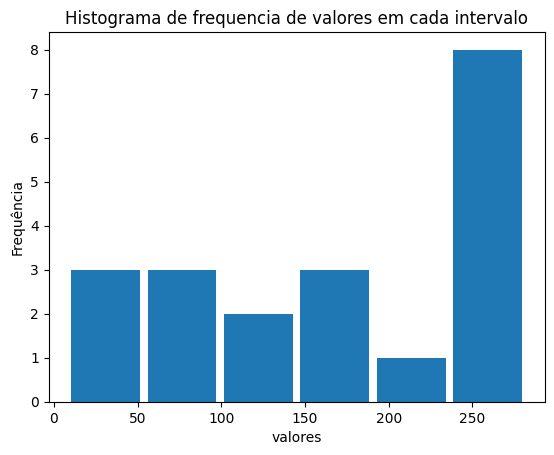

In [ ]:

plt.hist(dataset, bins= 6, rwidth=0.9)
plt.xlabel('valores')
plt.ylabel('Frequência')
plt.title('Histograma de frequencia de valores em cada intervalo')
plt.show()

# Criação de uma função e a chamada da mesma para criar a tabelça com os valores obtidos

In [ ]:
def criartabela(tab_interval,tab_freq,tab_freqabs):
    tabela03 = []
    a = ['intervalos']
    b = ['frequencia absoluta']
    c = ['frequencia relativa']
    a.extend(tab_interval)
    b.extend(tab_freq)
    c.extend(tab_freqabs)
    tab_dados = [a,b,c]
    print(tab_dados[1])
    tabela03 = tabulate(tab_dados,tablefmt="heavy_grid")
    return tabela03

tabela_110 = criartabela(valores_intervalo_1,valores_frequencia_1,freq_absoluta_1)
print(tabela_110)

['frequencia absoluta', 3, 3, 2, 3, 1, 8]
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ intervalos          ┃ [8, 30, 30] ┃ [54, 86, 94] ┃ [102, 110] ┃ [169, 170, 176] ┃ [236] ┃ [240, 241, 242, 255, 262, 276, 279, 282] ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ frequencia absoluta ┃ 3           ┃ 3            ┃ 2          ┃ 3               ┃ 1     ┃ 8                                        ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ frequencia relativa ┃ 0.15        ┃ 0.15         ┃ 0.1        ┃ 0.15            ┃ 0.05  ┃ 0.4                                      ┃
┗━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━┻━━━━━━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┻━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


# Tabela do caso 2, onde não foi arredondado

In [ ]:
tabela_2 = criartabela(valores_intervalo_2,valores_frequencia_2,freq_absoluta_2)
print(tabela_2)

['frequencia absoluta', 3, 3, 2, 3, 1, 7]
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ intervalos          ┃ [8, 30, 30] ┃ [54, 86, 94] ┃ [102, 110] ┃ [169, 170, 176] ┃ [236] ┃ [240, 241, 242, 255, 262, 276, 279] ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ frequencia absoluta ┃ 3           ┃ 3            ┃ 2          ┃ 3               ┃ 1     ┃ 7                                   ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ frequencia relativa ┃ 0.15        ┃ 0.15         ┃ 0.1        ┃ 0.15            ┃ 0.05  ┃ 0.35                                ┃
┗━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━┻━━━━━━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┻━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
